In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# ガウス基底
* 非線形回帰モデルの一種。ガウス分布の重ね合わせで回帰する
$$
y_i = w_0 +  \sum_{j=1}^m w_j  \phi _j (x_i) +  \varepsilon _i 
$$
* ガウス分布
$$
 \phi _j (x) = e ^ {  - \frac{ (x-  \mu _j) ^2}{2 \sigma ^2} } = exp ( - \frac{ (x-  \mu _j) ^2}{2 \sigma ^2} )
$$
    * μ : 平均
    * σ : 分散
* 量子力学で粒子の存在確率を回帰するとか

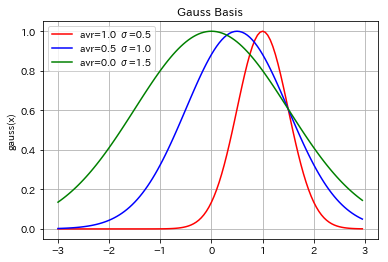

In [2]:
def gauss(x, u, s) :
    return np.exp(-(x-u)**2 / (2.0 * (s ** 2)))

x = np.arange(-3.0, 3.0, 0.05)
y = gauss(x, 1.0, 0.5)
y2 = gauss(x, 0.5, 1.0)
y3 = gauss(x, 0.0, 1.5)

plt.plot(x, y,"r", label="avr={} σ={}".format(1.0, 0.5))
plt.plot(x, y2,"b", label="avr={} σ={}".format(0.5, 1.0))
plt.plot(x, y3,"g", label="avr={} σ={}".format(0.0, 1.5))

plt.ylabel("gauss(x)")
plt.title("Gauss Basis")
plt.grid(True)
plt.legend()
plt.show()

# ガウスカーネル
* サポートベクターマシン (SVM) で、データを分別するための関数
* RBF (Radial Basis Function) 動径基底関数 とも呼ばれる
$$
K(u,v) = exp ( - \frac{ || \overrightarrow{u} -  \overrightarrow{v} || ^2}{2 \sigma ^2} )
$$
* n次元空間のガウス分布の重ね合わせで、データ分類の境界を表現する
* 下記は、3次元空間で高さが0.5以上と以下で境界線を作ったときの例

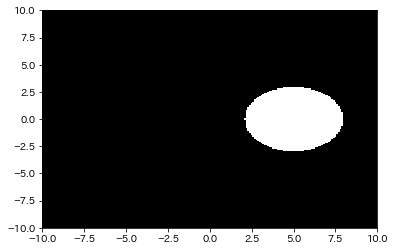

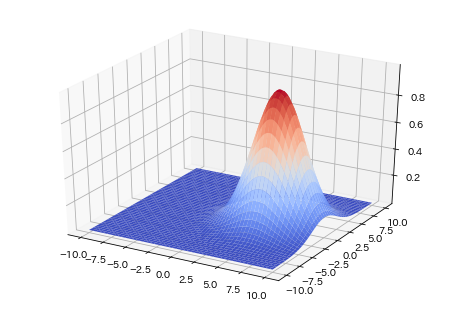

In [3]:
def kernel(u, v, s) :
    diff = u - v
    return np.exp( -1.0 * np.inner(diff, diff) / (2.0 * (s**2)))

def probability(u, vx, vy, s) :
    vals = []
    for v in np.c_[vx.ravel(),vy.ravel()] :
        vals.append(kernel(u,v,s))
        
    return np.array(vals).reshape(vx.shape)

vx,vy = np.meshgrid(np.linspace(-10,10,num=200), np.linspace(-10,10,num=200))

p = probability(np.array([ 5.0, 0.0]), vx, vy, 2.5)
z = p

# 2d
area = z.copy()
area[z>=0.5] = 1
area[z<0.5] = 0
fig, ax = plt.subplots()
heatmap = ax.pcolor(vx, vy, area, cmap=plt.cm.gray)

# 3d
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(vx, vy, z, cmap=plt.cm.coolwarm, linewidth=0, antialiased=True)

plt.show()

* ガウス分布を重ね合わせることで、任意の境界を作ることができる (下記は、うさちゃん、あるいはかえるくん)

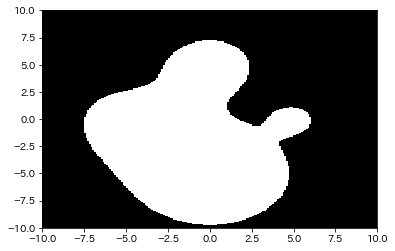

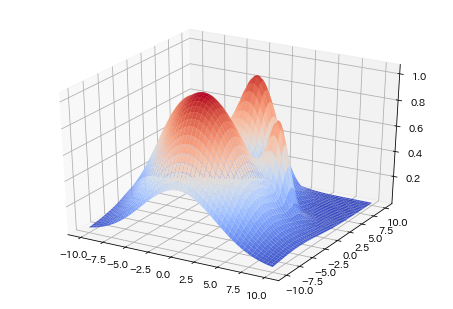

In [4]:
vx,vy = np.meshgrid(np.linspace(-10,10,num=200), np.linspace(-10,10,num=200))

p1 = probability(np.array([ 5.0, 0.0]), vx, vy, 1.0)
p2 = probability(np.array([ 0.0, 5.0]), vx, vy, 2.0)
p3 = probability(np.array([-5.0, 0.0]), vx, vy, 3.0)
p4 = probability(np.array([ 0.0,-5.0]), vx, vy, 4.0)
z = 0.6*p1 + 0.9*p2 + 0.6*p3 + 1.0*p4

# 2d
area = z.copy()
area[z>=0.5] = 1
area[z<0.5] = 0
fig, ax = plt.subplots()
heatmap = ax.pcolor(vx, vy, area, cmap=plt.cm.gray)

# 3d
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(vx, vy, z, cmap=plt.cm.coolwarm, linewidth=0, antialiased=True)

plt.show()